# COMS 4771 Homework 3  
##### Joseph High
##### UNI: jph2185

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal
import seaborn as sns
sns.set_style('darkgrid')

import math
import matplotlib

In [2]:
import sys
sys.path.insert(0, '/figures')

In [3]:
#random.seed(123)
x_min = -10
x_max = 10
y_min = -3
y_max = 3
N = 500
x = np.linspace(x_min, x_max, N)

### Part (v):

Generating random functions with $\mu = \vec{0}$ and $\Sigma = I\$

In [4]:
sigma = np.eye(N)
mean = np.zeros(N)

y = multivariate_normal.rvs(mean, sigma)

In [5]:
def rnd_func_plot(X, mu, sigma, title=''):
    fig = plt.figure(figsize = (15,11))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ind = ['1','2','3','4']
    for i in range(4):
        y = multivariate_normal.rvs(mu, sigma)
        plt.subplot(2,2,i+1)
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        #plt.xlabel('$x_i$', size = 14)
        plt.ylabel('Function Value', size=13)
        plt.title('Random Function ' + ind[i] + title)
        plt.plot(X,y)

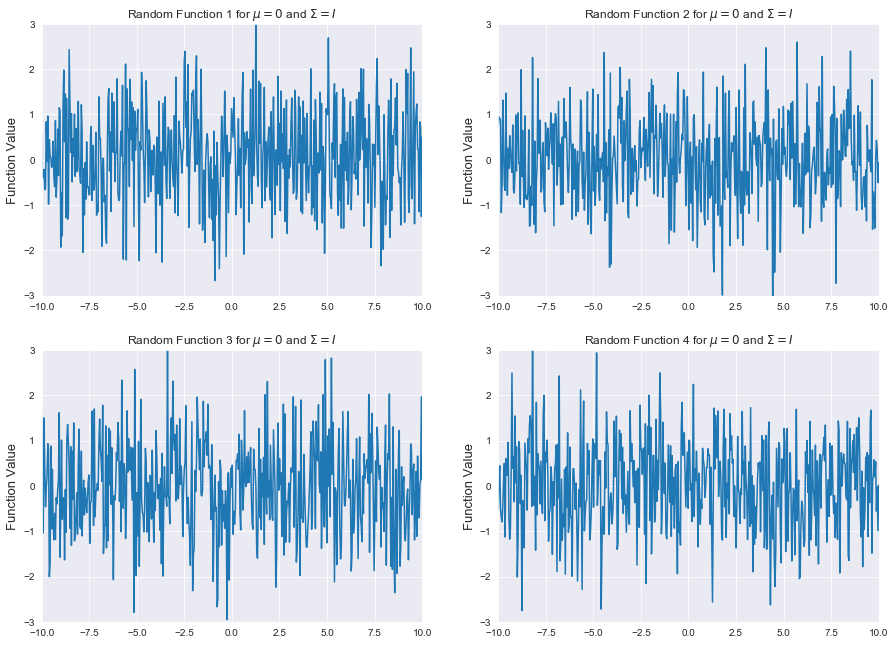

In [6]:
rnd_func_plot(x, mean, sigma, ' for $\mu = 0$ and $\Sigma = I$')
plt.savefig('./figures/part_v_whitenoise.png', bbox_inches='tight')

Generating random functions with $\mu = \vec{0}$ and $\Sigma = \mathbb{J}_{500}\$  (i.e., the all ones matrix)

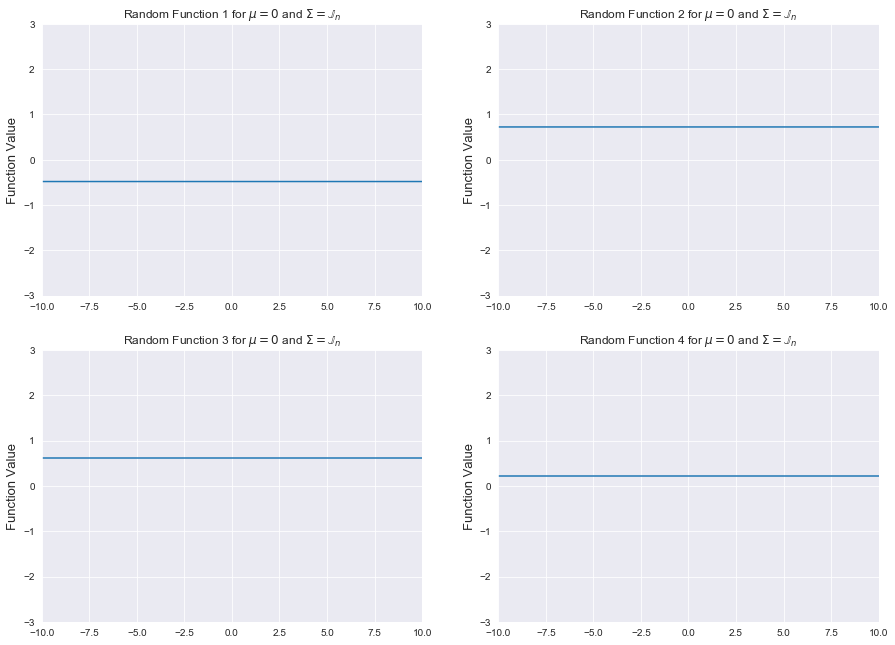

In [7]:
sigma_ones = np.ones((N,N))
rnd_func_plot(x, mean, sigma_ones, ' for $\mu = 0$ and $\Sigma = \mathbb{J}_n$')
plt.savefig('./figures/part_v_correlated.png', bbox_inches='tight')

In [8]:
sigma2 = sigma_ones*0.1 + sigma*0.1
sigma2

array([[0.2, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.2, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.2, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.2, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.2, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.2]])

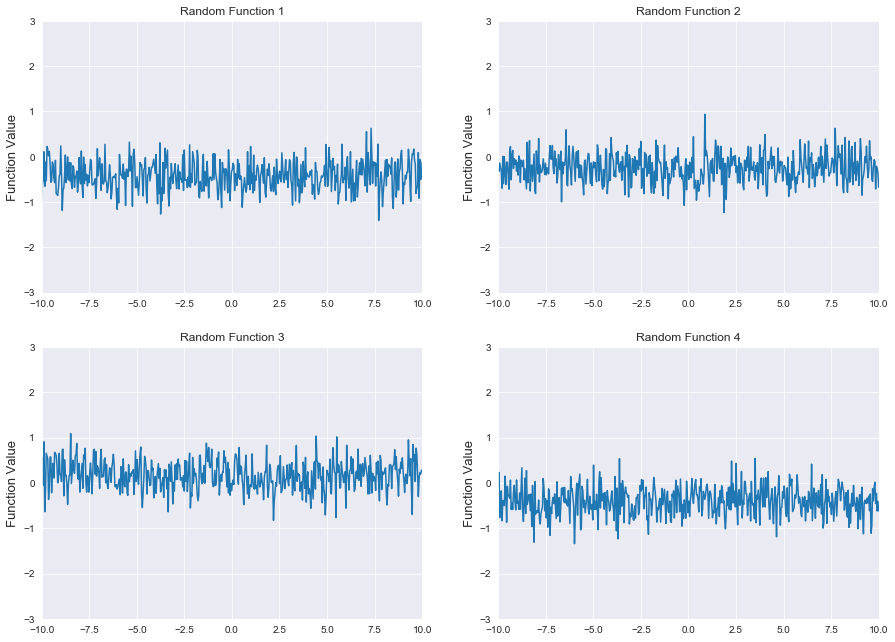

In [9]:
rnd_func_plot(x, mean, sigma2)
plt.savefig('./figures/part_v_mean0_cov01.png', bbox_inches='tight') 

In [10]:
sigma3 = sigma_ones*0.1 + sigma*0.05
mu3 = mean - 1

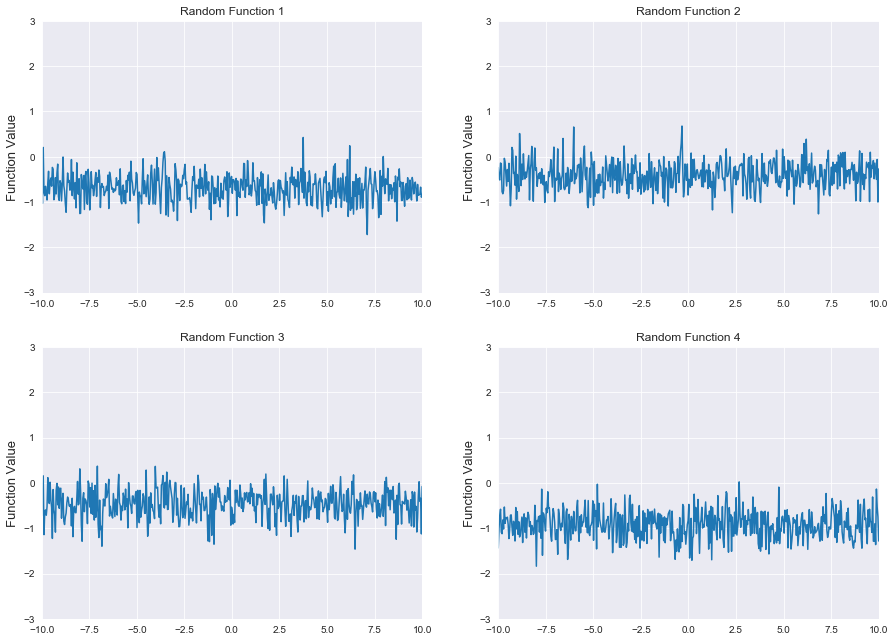

In [11]:
rnd_func_plot(x, mu3, sigma2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


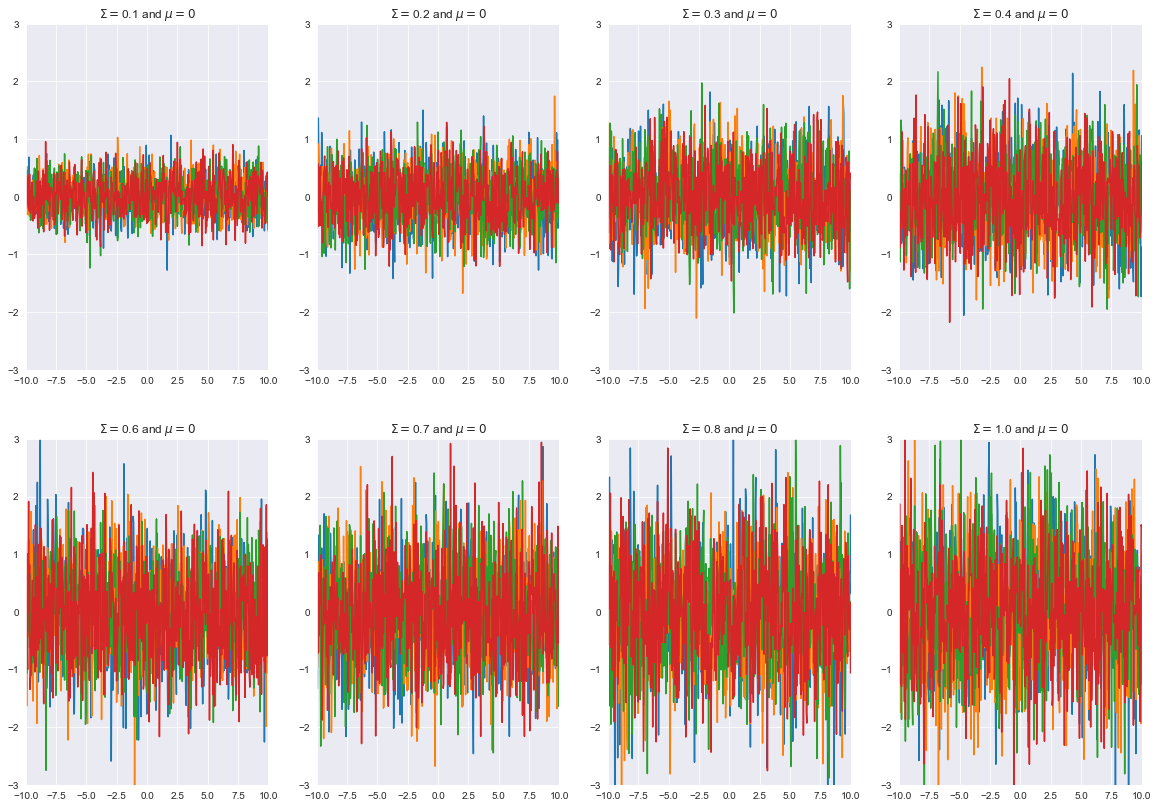

In [12]:
fig = plt.figure(figsize = (20, 14))
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
d = np.linspace(0.1, 1, 8)
for i, alpha in enumerate(d):
    sigma_exp = alpha*sigma 
    y = multivariate_normal.rvs(mean, sigma_exp, size=4)
    for yi in y:
        plt.subplot(2,4,i+1)
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        plt.title('$\Sigma = $' + str(alpha)[:3] + ' and $\mu = 0$')
        plt.plot(x,yi)
plt.savefig('./figures/part_v_sigma.png', bbox_inches='tight') 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


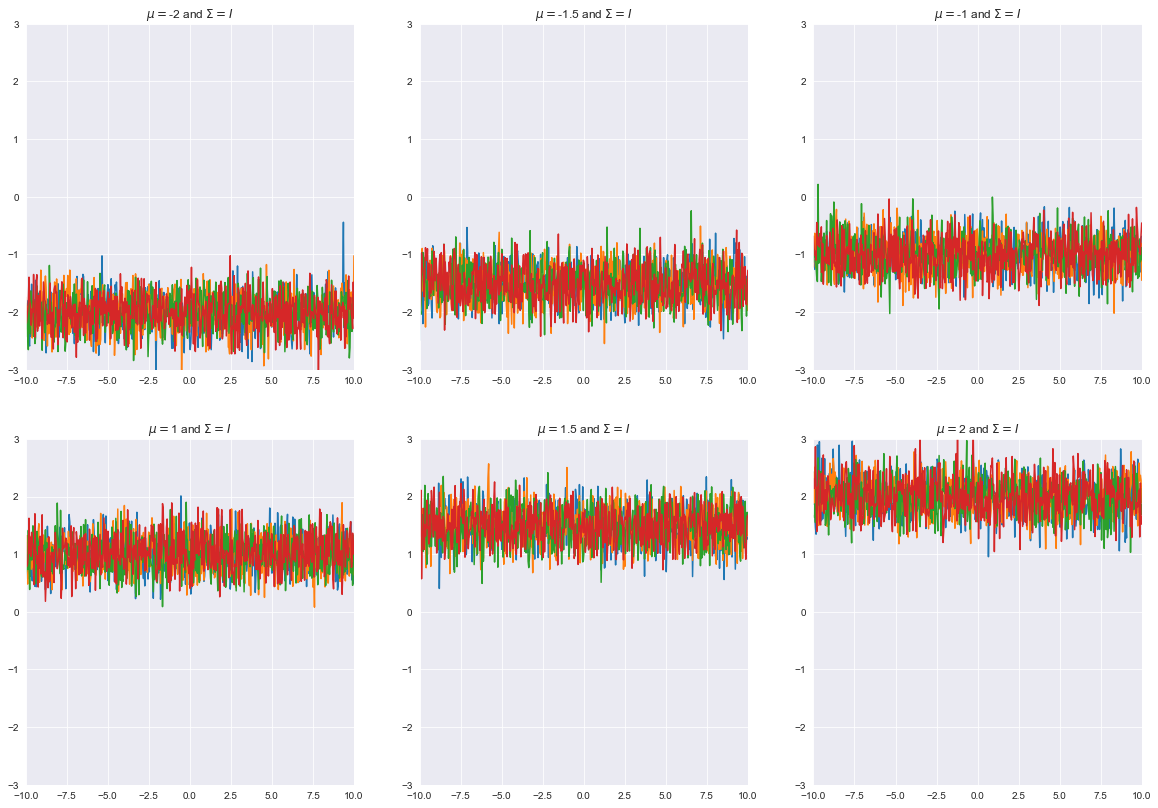

In [13]:
fig = plt.figure(figsize = (20, 14))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
d = np.linspace(0.5, 1, 6)
d = [-2, -1.5, -1, 1, 1.5, 2]
for i, alpha in enumerate(d):
    mu_exp = mean + d[i]
    sigma_exp = sigma*0.1
    y = multivariate_normal.rvs(mu_exp, sigma*0.1, size=4)
    for yi in y:
        plt.subplot(2,3,i+1)
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        plt.title('$\mu = $' + str(d[i]) + ' and $\Sigma = I$')
        plt.plot(x,yi)
plt.savefig('./figures/part_v_mu.png', bbox_inches='tight') 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


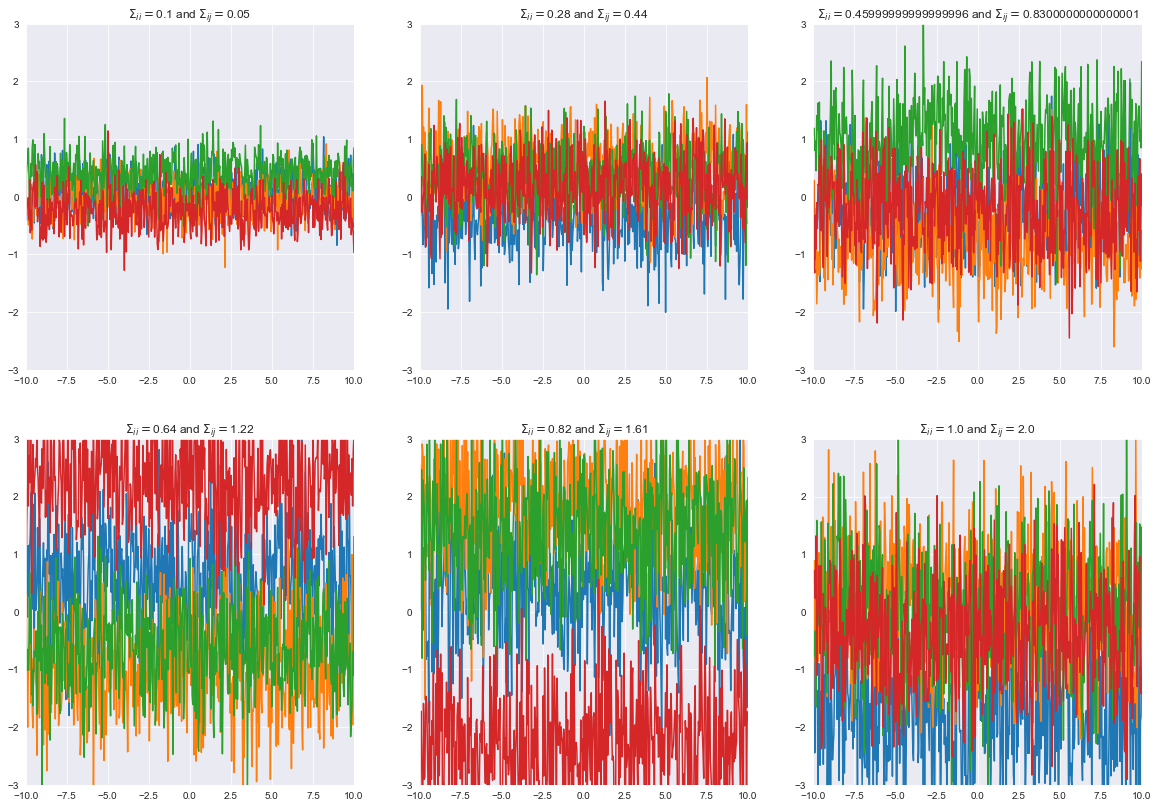

In [14]:
fig = plt.figure(figsize = (20, 14))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
d = np.linspace(0.1, 1, 6)
od = np.linspace(0.05, 2, 6)
#d = [-2, -1.5, -1, 1, 1.5, 2]
for i, alpha in enumerate(d):
    #mu_exp = mean + d[i]
    sigma_exp = sigma*d[i] + sigma_ones*od[i]
    y = multivariate_normal.rvs(mean, sigma_exp, size=4)
    for yi in y:
        plt.subplot(2,3,i+1)
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        plt.title('$\Sigma_{ii} = $' + str(d[i]) + ' and $\Sigma_{ij} = $' + str(od[i]))
        plt.plot(x,yi)
plt.savefig('./figures/part_v_sigma2.png', bbox_inches='tight') 

### Part (vi)

In [15]:
def kernel_fnc(X):
    k = np.zeros((N,N))
    for i in range(sigma.shape[0]):
        for j in range(sigma.shape[1]):
            k[i][j]=np.exp(-((X[i]-X[j])**2)/5)
    return k

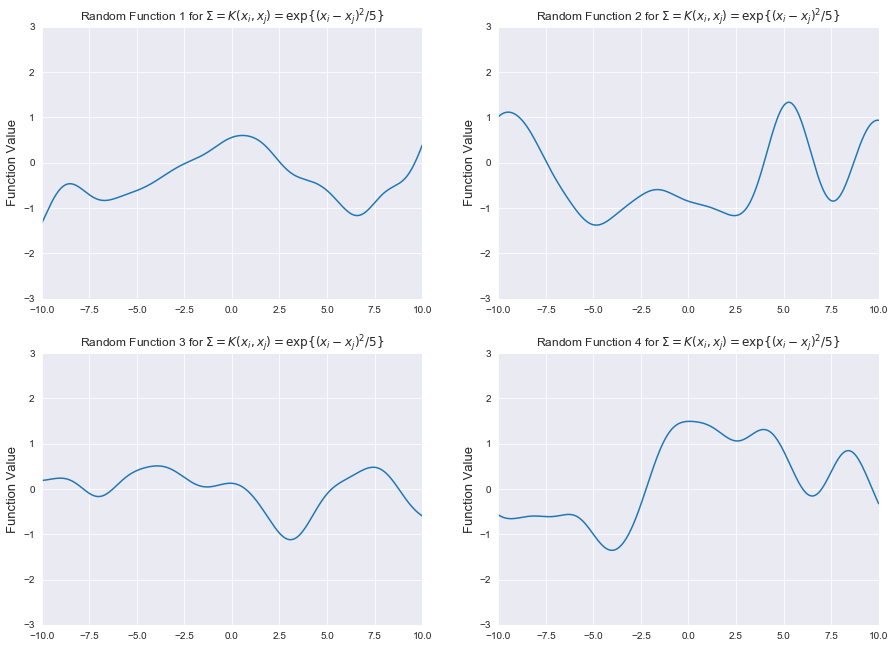

In [16]:
k = kernel_fnc(x)
rnd_func_plot(x, mean, k, ' for $\Sigma = K(x_i, x_j) = \exp\{(x_i - x_j)^2/5\}$')
plt.savefig('./figures/part_vi_kernel.png', bbox_inches='tight') 

### Part (vii)

In [17]:
def periodic_kernel(X):
    k = np.zeros((N,N))
    for i in range(sigma.shape[0]):
        for j in range(sigma.shape[1]):
            k[i][j]=np.exp(-(2*np.square(np.sin((X[i]-X[j])/2))/9))
    return k

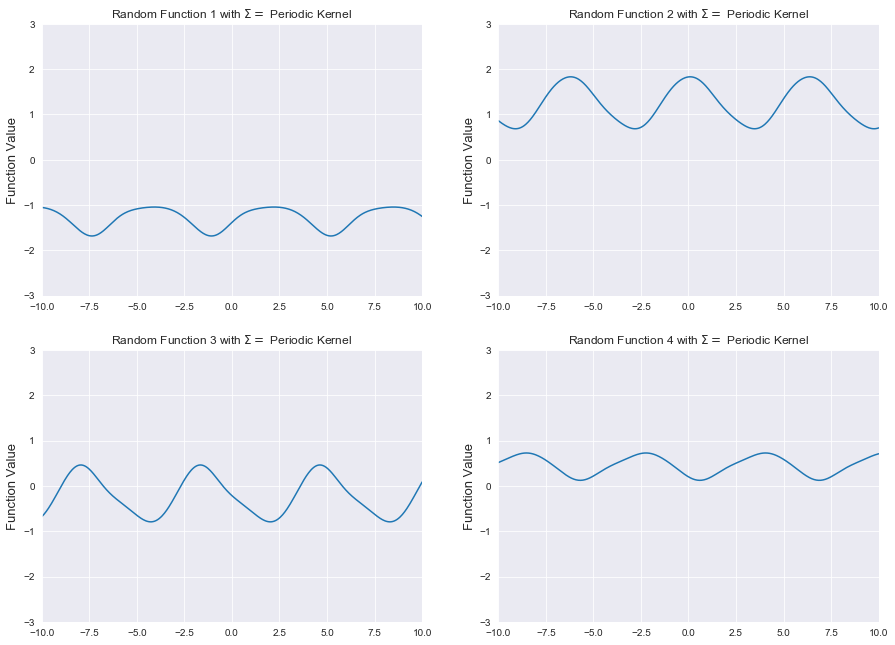

In [18]:
k2 = periodic_kernel(x)
rnd_func_plot(x, mean, k2, ' with $\Sigma =$ Periodic Kernel')
plt.savefig('./figures/part_vii.png', bbox_inches='tight') 

### Part (ix) 

In [19]:
def K(X1, X2):
    k = np.zeros((X1.shape[0], X2.shape[0]))
    for i, t in enumerate(X1):
        for j, t in enumerate(X2):
            k[i][j]=np.exp(-np.square(X1[i]-X2[j])/5)
    return k

In [20]:
x_train = np.array([-6, 0, 7])
y_train = np.array([3, -2, 2])

X_join = np.concatenate((x, x_train), axis=0)

In [21]:
mu_n = np.zeros((x.shape[0]))
mu_m = np.zeros((x_train.shape[0]))

K11 = K(x,x)
K12 = K(x,x_train)
K21 = K(x_train,x)
K22 = K(x_train, x_train)
K1 = np.concatenate((K11, K12), axis=1)
K2 = np.concatenate((K21, K22), axis=1)
K = np.concatenate((K1, K2), axis=0)

In [22]:
Mu_K = mu_n + K12@np.linalg.inv(K22)@(y_train - mu_m)
Sigma_K = K11 - K12@np.linalg.inv(K22)@K21

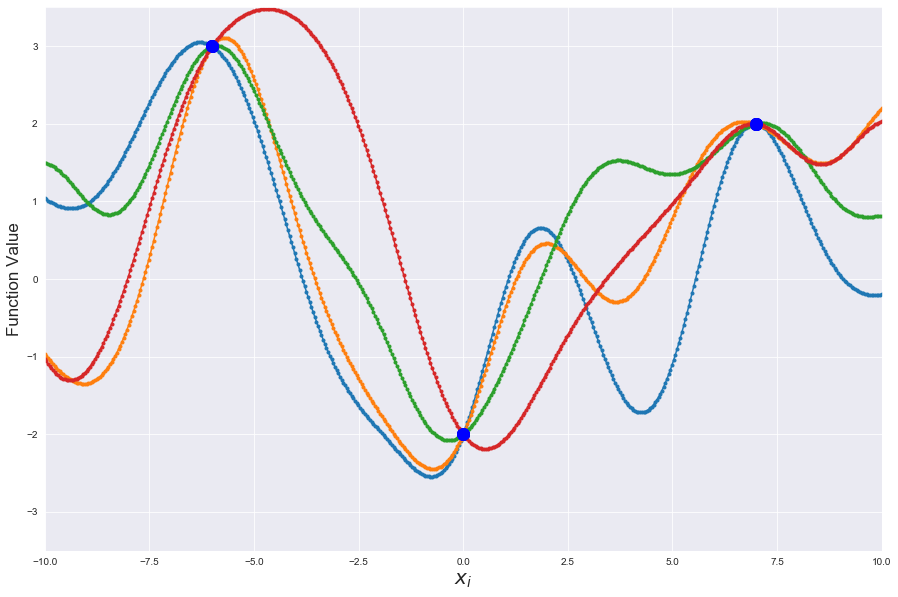

In [23]:
fig = plt.figure(figsize = (15,10))
for _ in range(4):
    y = multivariate_normal.rvs(Mu_K, Sigma_K)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min-0.5,y_max+0.5)
    plt.ylabel('Function Value', size=17)
    plt.xlabel('$x_i$', size=20)
    plt.plot(x, y, marker='.')
    plt.plot(x_train,y_train, 'bo', markersize=12)    
plt.savefig('./figures/part_ix.png', bbox_inches='tight') 

### Part (x)

In [24]:
def periodic_K(X1, X2):
    k = np.zeros((X1.shape[0], X2.shape[0]))
    for i, t in enumerate(X1):
        for j, t in enumerate(X2):
            k[i][j]=np.exp(-(2*np.square(np.sin((X1[i]-X2[j])/2))/9))
    return k

In [25]:
K_periodic11 = periodic_K(x,x)
K_periodic12 = periodic_K(x,x_train)
K_periodic21 = periodic_K(x_train,x)
K_periodic22 = periodic_K(x_train, x_train)
K_1 = np.concatenate((K_periodic11, K_periodic12), axis=1)
K_2 = np.concatenate((K_periodic21, K_periodic22), axis=1)
K_periodic = np.concatenate((K_1, K_2), axis=0)

In [26]:
mu_periodic = mu_n + K_periodic12@np.linalg.inv(K_periodic22)@(y_train - mu_m)
sigma_periodic = K_periodic11 - K_periodic12@np.linalg.inv(K_periodic22)@K_periodic21

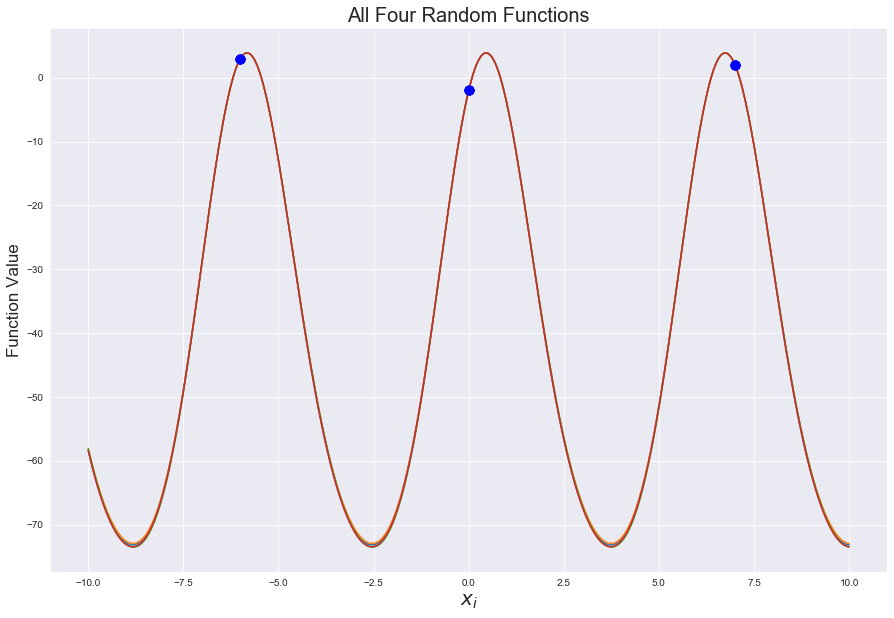

In [27]:
fig = plt.figure(figsize = (15,10))
for _ in range(4):
    y = multivariate_normal.rvs(mu_periodic, sigma_periodic)
    plt.ylabel('Function Value', size=17)
    plt.xlabel('$x_i$', size=20)
    plt.title('All Four Random Functions', size=20)
    plt.plot(x, y, '-')
    plt.plot(x_train,y_train, 'bo', markersize=9)    
plt.savefig('./figures/part_x_all4.png', bbox_inches='tight') 

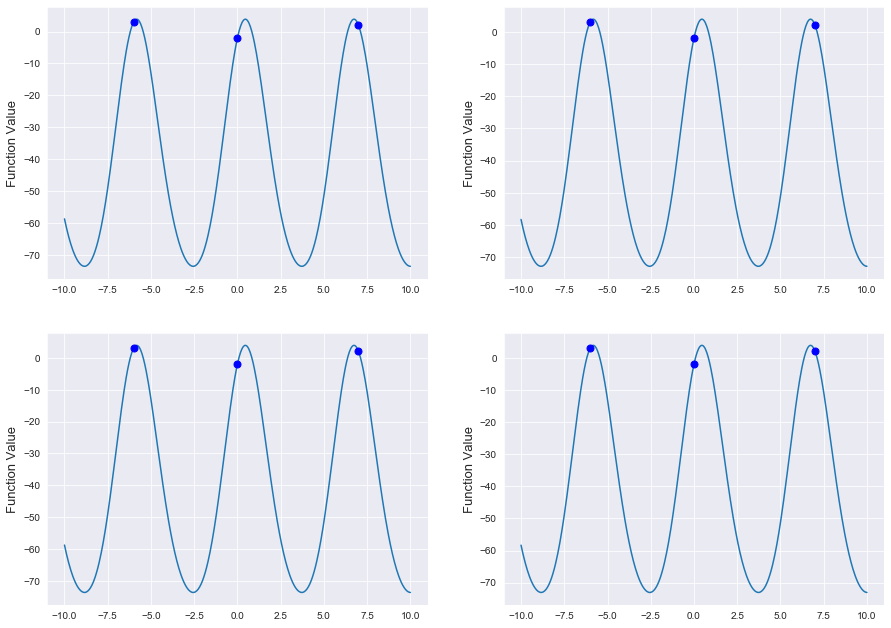

In [28]:
fig = plt.figure(figsize = (15,11))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ind = ['1','2','3','4']
for i in range(4):
    y = multivariate_normal.rvs(mu_periodic, sigma_periodic)
    plt.subplot(2,2,i+1)
    plt.ylabel('Function Value', size=13)
    #plt.title('Random Function ' + ind[i])
    plt.plot(x, y)
    plt.plot(x_train,y_train, 'bo', markersize=7)  
plt.savefig('./figures/part_x_individual.png', bbox_inches='tight') 

In [29]:
#def kernel_fnc(X1, X2):
#    k = np.zeros((X1.shape[0],X2.shape[0]))
#    for i in range(X1.shape[0]):
#        for j in range(X2.shape[0]):
#            k[i][j]=np.exp(-((X1[i]-X2[j])**2)/5)
#    return k

### Part (xii)

In [30]:
mean_posterior = K12@np.linalg.inv(K22)@y_train
mean_periodic_posterior = K_periodic12@np.linalg.inv(K_periodic22)@y_train

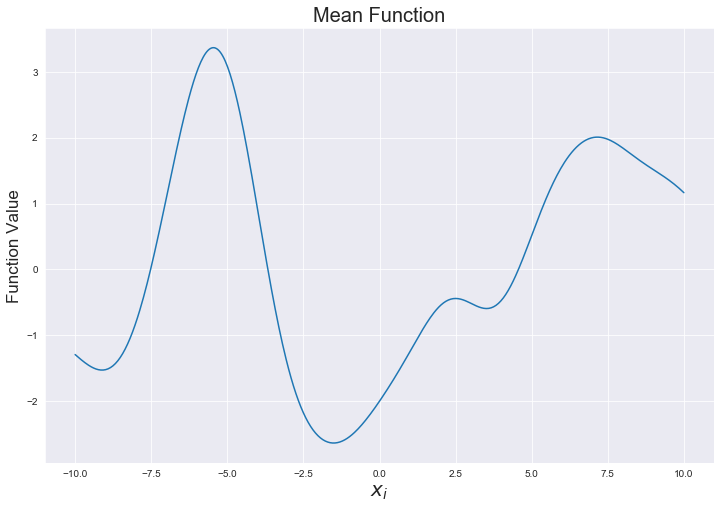

In [31]:
fig = plt.figure(figsize = (12,8))
y = multivariate_normal.rvs(mean_posterior, Sigma_K)
plt.ylabel('Function Value', size=17)
plt.xlabel('$x_i$', size=20)
plt.title('Mean Function', size=20)
plt.plot(x, y)   
plt.savefig('./figures/part_xii_posterior.png', bbox_inches='tight') 

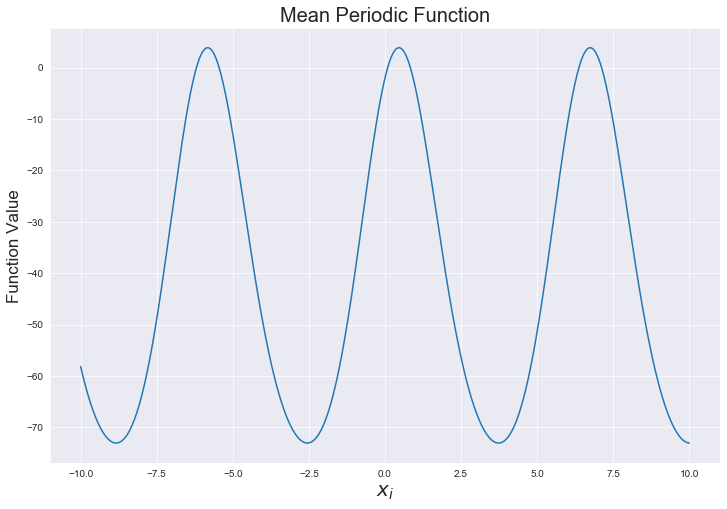

In [32]:
fig = plt.figure(figsize = (12,8))
y = multivariate_normal.rvs(mean_periodic_posterior, sigma_periodic)
plt.ylabel('Function Value', size=17)
plt.xlabel('$x_i$', size=20)
plt.title('Mean Periodic Function', size=20)
plt.plot(x, y)  
plt.savefig('./figures/part_xii_periodic.png', bbox_inches='tight') 